<a href="https://colab.research.google.com/github/kalravm41/project115/blob/main/project115.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import plotly.express as px
import csv

df = pd.read_csv('data.csv')

velocity = df['Velocity'].tolist()
escaped = df['Escaped'].tolist()

fig = px.scatter(x= velocity, y= escaped)
fig.show()

In [5]:
import numpy as np

velocityarr = np.array(velocity)
escapedarr = np.array(escaped)

m,c = np.polyfit(velocityarr, escapedarr, 1)

y = []

for x in velocity:
  y_value = m*x+c
  y.append(y_value)

fig = px.scatter(x= velocityarr, y= escapedarr)
fig.update_layout(shapes=[
                          dict(
                              type= 'line',
                               y0= min(y), y1= max(y),
                               x0= min(velocityarr), x1= max(velocityarr)
                          )
])
fig.show()

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



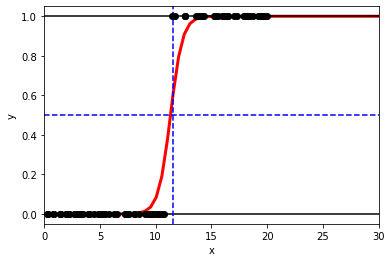

In [23]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

X = np.reshape(velocity, (len(velocity),1))
Y = np.reshape(escaped, (len(escaped),1))

lr = LogisticRegression()

lr.fit(X,Y)
plt.figure()

plt.scatter(X.ravel(), Y, color = 'Black', zorder = 20)

def model(x):
  return 1/(1+np.exp(-x))

X_test = np.linspace(0,100,200)
chances = model(X_test*lr.coef_+ lr.intercept_).ravel()

plt.plot(X_test, chances, color= 'red', linewidth = 3)
plt.axhline(y= 0, color= 'k', linestyle = '-')
plt.axhline(y= 1, color= 'k', linestyle = '-')
plt.axhline(y= 0.5, color= 'b', linestyle = '--')
plt.axvline(x= X_test[23], color= 'b', linestyle= '--')

plt.ylabel('y')
plt.xlabel('x')

plt.xlim(0,30)

plt.show()

In [26]:
velocity = float(input("Enter The Velocity: "))
chances = model(velocity*lr.coef_+lr.intercept_).ravel()[0]

if chances <= 0.01:
  print('Not escaped')
elif chances >= 1:
  print('escaped')  
elif chances <= 0.5:
  print('may not be escaped')  
else:
  print('May escape')    

Enter The Velocity: 95
escaped
